In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [134]:
df = pd.read_csv('un-country-data.csv')

C:\Users\tonys\AppData\Local\Temp\ipykernel_152700\1688472621.py:1: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('un-country-data.csv')


In [135]:
countries = df[df["ISO3_code"].notnull()]
columns = ["ISO3_code","Location","Time","TPopulation1Jan","TPopulation1July"]
cleaned = countries[columns]
cleaned = cleaned.reset_index()

In [136]:
cleaned.head()

,index,ISO3_code,Location,Time,TPopulation1Jan,TPopulation1July
0,44384,BDI,Burundi,1950,2229.322,2254.938
1,44385,BDI,Burundi,1951,2280.554,2305.746
2,44386,BDI,Burundi,1952,2330.938,2355.804
3,44387,BDI,Burundi,1953,2380.670,2405.186
4,44388,BDI,Burundi,1954,2429.703,2454.586


In [140]:
pop_data_1950 = cleaned[cleaned["Time"] == 1950]
top_countries = pop_data_1950.nlargest(10,"TPopulation1Jan").sort_values("TPopulation1Jan",ascending=True)

In [142]:
top_countries

,index,ISO3_code,Location,Time,TPopulation1Jan,TPopulation1July
21280,67792,ITA,Italy,1950,46175.129,46391.673
20064,66424,GBR,United Kingdom,1950,49931.042,50121.017
29944,77368,BRA,Brazil,1950,52620.377,53408.551
12464,58216,IDN,Indonesia,1950,68080.719,68799.025
23256,69920,DEU,Germany,1950,69917.533,69847.782
10336,55784,JPN,Japan,1950,85696.541,86443.277
17632,63840,RUS,Russian Federation,1950,102666.467,103392.360
32376,79952,USA,United States of America,1950,153067.374,154202.680
11248,56848,IND,India,1950,342592.267,346278.821
9576,55024,CHN,China,1950,539190.005,544044.358


In [144]:
frames = cleaned["Time"].unique()

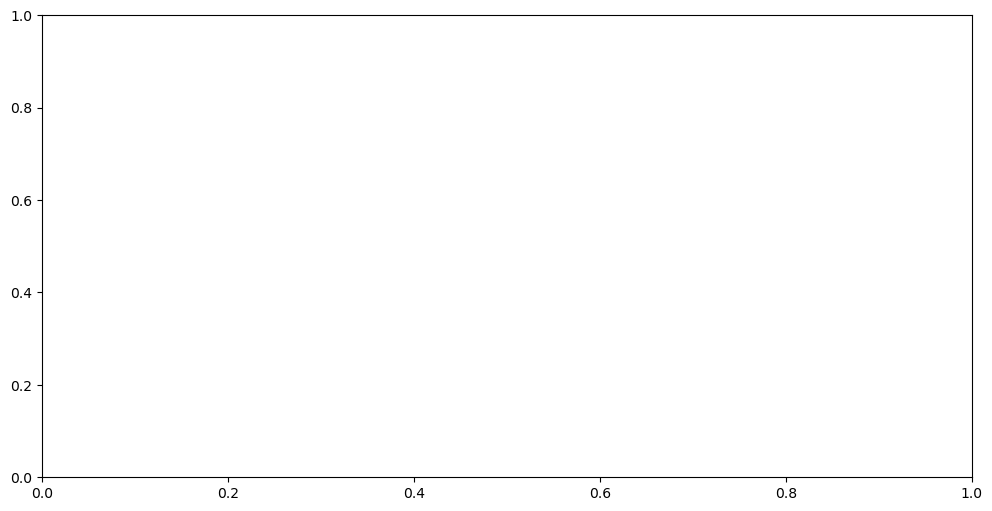

In [146]:
fig , ax = plt.subplots(figsize=(12,6))

def animate(frame):
    ax.clear()
    
    pop_data = cleaned[cleaned["Time"] == frame]
    pop_countries = pop_data.nlargest(10,"TPopulation1Jan").sort_values("TPopulation1Jan",ascending=True)

    ax.barh(pop_countries["Location"],pop_countries["TPopulation1Jan"])


In [148]:
anim = ani.FuncAnimation(fig, animate, frames=frames,interval=200)
plt.show()
